# 1. Importing the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_path = '../../dataset/'

In [3]:
df_news = pd.read_csv(dataset_path + '/news/news [only_date].csv')
df_price = pd.read_csv(dataset_path + '/price/btc_usd_daily.csv')

In [4]:
df_news.head()

,date,headline,source
0,2020-03-16,"Bitcoin Risks Falling to $2,900 if Market is H...",https://www.newsbtc.com/2020/03/14/bitcoin-ris...
1,2020-03-16,"Here’s Why Bitcoin Didn’t Bottom at $3,800 Acc...",https://www.newsbtc.com/2020/03/15/heres-why-b...
2,2020-03-16,"Bitcoin Sinks to $4,390 as Dow’s 1,000-Point D...",https://www.newsbtc.com/2020/03/16/bitcoin-sin...
3,2020-03-16,Bitcoin could soon be in the museum of illusio...,https://eng.ambcrypto.com/bitcoin-could-soon-b...
4,2020-03-16,Bitcoin Price Analysis: BTC’s 3-Day Consolidat...,https://cryptopotato.com/bitcoin-price-analysi...


In [5]:
df_news.shape

(17047, 3)

In [6]:
df_price.head()

,date,open,close,high,low,change,volume,market_cap
0,2020-03-24,6436.64,6734.80,6789.02,6411.07,4.63,48221910672,123148917787
1,2020-03-23,5831.37,6416.31,6443.93,5785.00,10.03,46491916000,117314776187
2,2020-03-22,6185.56,5830.25,6359.70,5823.71,-5.74,40099664740,106591196069
3,2020-03-21,6206.52,6185.07,6378.14,5932.82,-0.35,42494390880,113068192795
4,2020-03-20,6191.65,6198.78,6844.26,5865.78,0.12,54442976103,113309245860


In [7]:
df_price.shape

(2522, 8)

# 2. Data Cleaning and Preprocessing

In [8]:
# Grouping the news according to date
date_index = df_news.groupby(['date']).groups
keys = list(date_index.keys())

dict = {}

for key in keys:
    titles = df_news[df_news['date'] == key]['headline']
    titles = titles.values.tolist()
    dict[key] = titles
    
df_grouped_news = pd.DataFrame(list(dict.values()))
df_grouped_news.insert(0, "date", keys)
df_grouped_news.head(1)

,date,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,Bitcoin Consolidation Continues,"The price of bitcoin passed $1,000 during the ...",The New Year Could Bode Well for Bitcoin and B...,Bitcoin Starts 2017 at the $1000,The European Union Wants to Identify Bitcoin U...,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df_grouped_news.shape

(1128, 43)

In [10]:
rows, cols = df_grouped_news.shape

In [11]:
titles = []

for row in range(0, rows):
    titles.append(' '.join(str(x) for x in df_grouped_news.iloc[row, 1: cols] if str(x) != 'None'))
    
titles[0]

'Colombia Declares Bitcoin and Other Digital Currencies Illegal Bitcoin Consolidation Continues The price of bitcoin passed $1,000 during the first day of trading in 2017. The New Year Could Bode Well for Bitcoin and Blockchains Bitcoin Starts 2017 at the $1000 The European Union Wants to Identify Bitcoin Users'

In [12]:
df_date = df_grouped_news['date'].copy()

In [13]:
df_merged = pd.DataFrame({'date': df_date, 'headlines': titles})
df_merged.head()

,date,headlines
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...
1,2017-01-02,Bitspark's George Harrap lists his takeaways f...
2,2017-01-03,State Street bank is on the verge of putting s...
3,2017-01-04,Charlie Shrem is re-imagining investment on th...
4,2017-01-05,Need a catch-up on recent price developments? ...


# 3. Sentiment Analysis

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [15]:
df_merged['compound'] = ''
df_merged['positive'] = ''
df_merged['negative'] = ''
df_merged['neutral'] = ''

df_merged.head()

,date,headlines,compound,positive,negative,neutral
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,,,,
1,2017-01-02,Bitspark's George Harrap lists his takeaways f...,,,,
2,2017-01-03,State Street bank is on the verge of putting s...,,,,
3,2017-01-04,Charlie Shrem is re-imagining investment on th...,,,,
4,2017-01-05,Need a catch-up on recent price developments? ...,,,,


In [16]:
for index, text in enumerate(df_merged['headlines']):
    polarity_score = sia.polarity_scores(text)
    
    df_merged['compound'][index] = polarity_score['compound']
    df_merged['positive'][index] = polarity_score['pos']
    df_merged['negative'][index] = polarity_score['neg']
    df_merged['neutral'][index] = polarity_score['neu']

In [17]:
df_merged.head()

,date,headlines,compound,positive,negative,neutral
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,-0.3612,0.04,0.068,0.892
1,2017-01-02,Bitspark's George Harrap lists his takeaways f...,0.6298,0.079,0.026,0.895
2,2017-01-03,State Street bank is on the verge of putting s...,0.8875,0.099,0.043,0.858
3,2017-01-04,Charlie Shrem is re-imagining investment on th...,0.8847,0.074,0.032,0.895
4,2017-01-05,Need a catch-up on recent price developments? ...,0.8248,0.056,0.007,0.936


In [18]:
# Change the date format of dataframes
df_price['date'] = pd.to_datetime(df_price['date'])
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [19]:
combined_data = pd.merge(df_merged, df_price, on='date', how='inner')
combined_data.head()

,date,headlines,compound,positive,negative,neutral,open,close,high,low,change,volume,market_cap
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,-0.3612,0.04,0.068,0.892,963.66,998.33,1003.08,958.70,3.60,147775008,16050407461
1,2017-01-02,Bitspark's George Harrap lists his takeaways f...,0.6298,0.079,0.026,0.895,998.62,1021.75,1031.39,996.70,2.32,222184992,16429024775
2,2017-01-03,State Street bank is on the verge of putting s...,0.8875,0.099,0.043,0.858,1021.60,1043.84,1044.08,1021.60,2.18,185168000,16786368910
3,2017-01-04,Charlie Shrem is re-imagining investment on th...,0.8847,0.074,0.032,0.895,1044.40,1154.73,1159.42,1044.40,10.56,344945984,18571869009
4,2017-01-05,Need a catch-up on recent price developments? ...,0.8248,0.056,0.007,0.936,1156.73,1013.38,1191.10,910.42,-12.39,510199008,16300254795


In [20]:
# Adding labels to the days
label = combined_data['change'].apply(lambda x: 1 if x>0 else 0)
combined_data['label'] = label

In [21]:
combined_data.head()

,date,headlines,compound,positive,negative,neutral,open,close,high,low,change,volume,market_cap,label
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,-0.3612,0.04,0.068,0.892,963.66,998.33,1003.08,958.70,3.60,147775008,16050407461,1
1,2017-01-02,Bitspark's George Harrap lists his takeaways f...,0.6298,0.079,0.026,0.895,998.62,1021.75,1031.39,996.70,2.32,222184992,16429024775,1
2,2017-01-03,State Street bank is on the verge of putting s...,0.8875,0.099,0.043,0.858,1021.60,1043.84,1044.08,1021.60,2.18,185168000,16786368910,1
3,2017-01-04,Charlie Shrem is re-imagining investment on th...,0.8847,0.074,0.032,0.895,1044.40,1154.73,1159.42,1044.40,10.56,344945984,18571869009,1
4,2017-01-05,Need a catch-up on recent price developments? ...,0.8248,0.056,0.007,0.936,1156.73,1013.38,1191.10,910.42,-12.39,510199008,16300254795,0


In [22]:
combined_data.shape

(1128, 14)

In [29]:
combined_data.to_csv('combined_data.csv', index=False)

# 4. Compund/Positive/Negative vs Change

In [24]:
import matplotlib.pyplot as plt

In [25]:
compounds = combined_data['compound'].values
positives = combined_data['positive'].values
negatives = combined_data['negative'].values

changes = combined_data['change'].values

#### Compound vs Change

Text(0.5, 1.015, 'Compound vs Change')

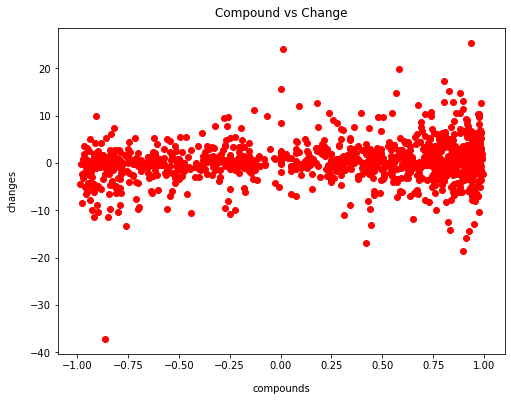

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(compounds, changes, color='red')
plt.xlabel("compounds", labelpad=13)
plt.ylabel("changes", labelpad=13)
plt.title("Compound vs Change", y=1.015)

#### Positive vs Change

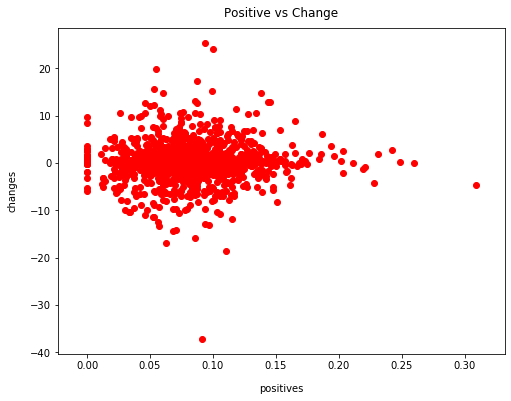

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(positives, changes, color='red')
plt.xlabel("positives", labelpad=13)
plt.ylabel("changes", labelpad=13)
plt.title("Positive vs Change", y=1.015);

#### Negative vs Change

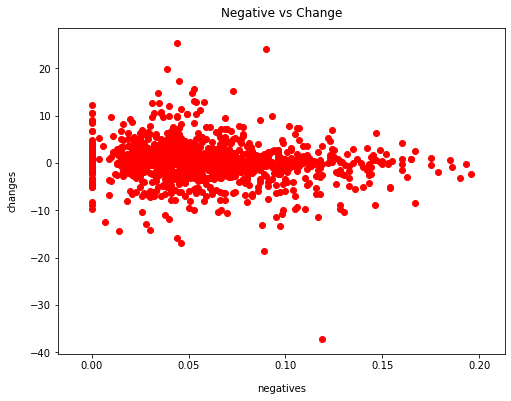

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(negatives, changes, color='red')
plt.xlabel("negatives", labelpad=13)
plt.ylabel("changes", labelpad=13)
plt.title("Negative vs Change", y=1.015);